#### Scatter Plot
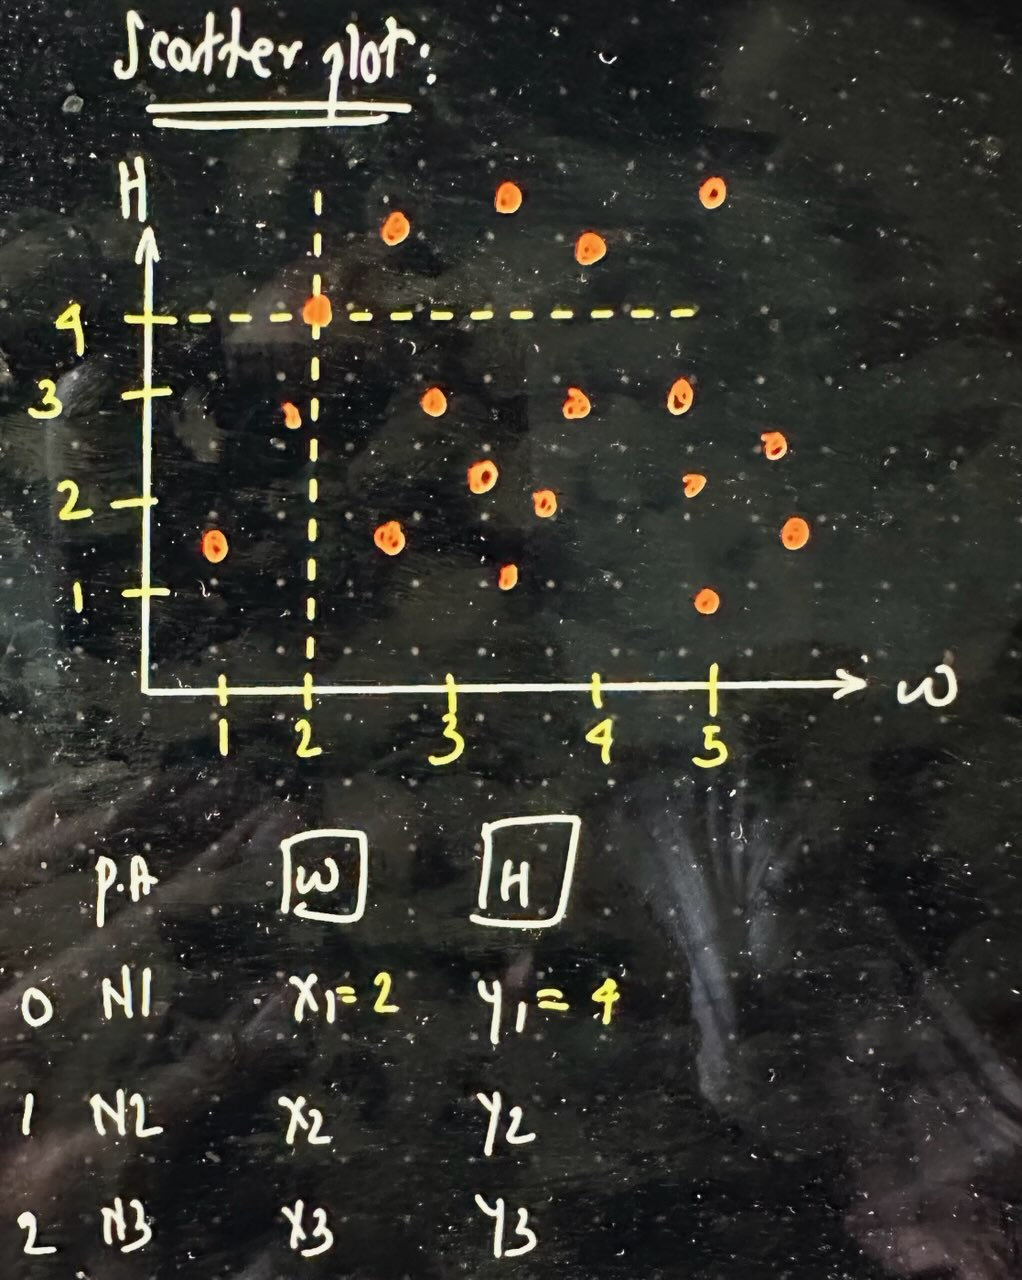

#### Line Chart
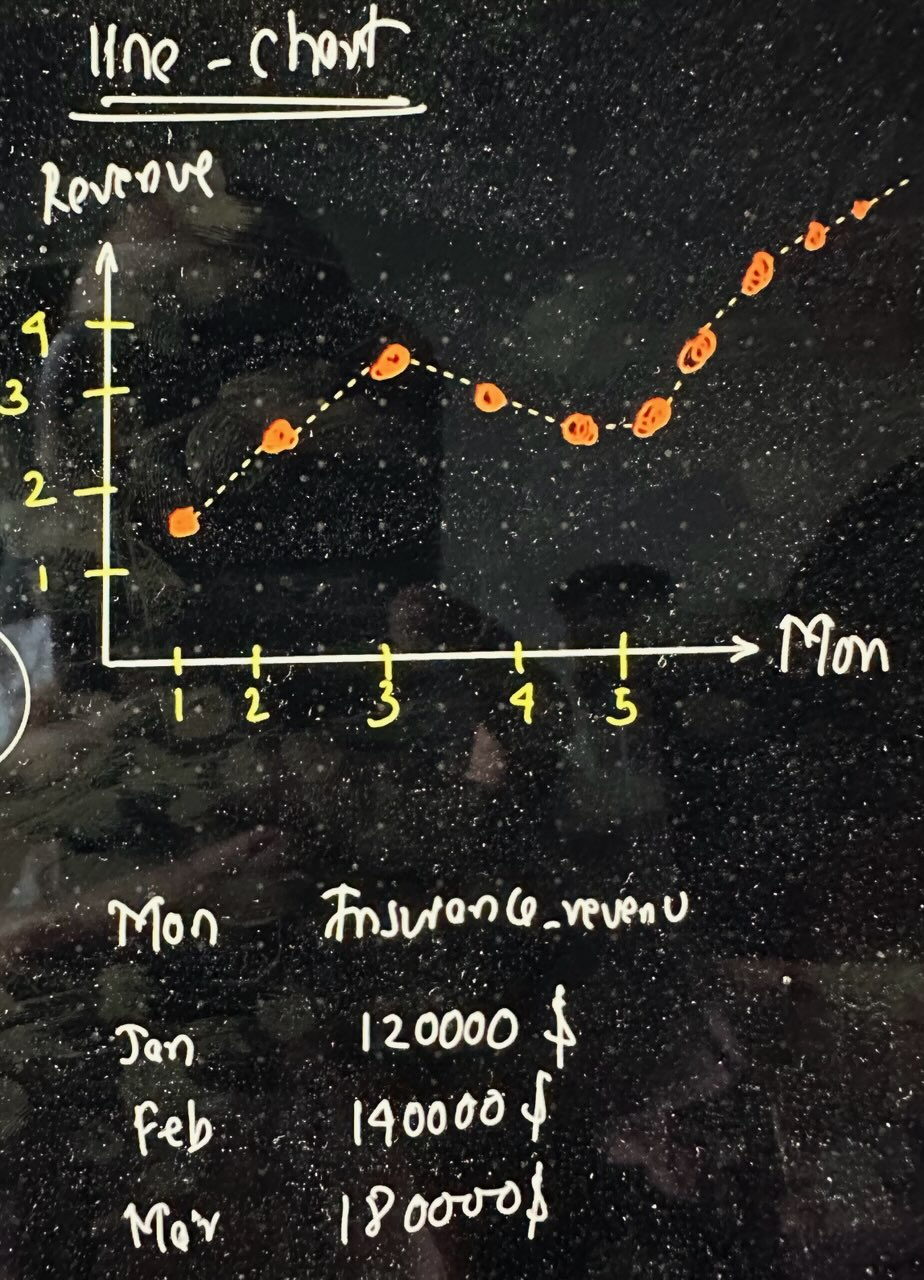

#### Bar Plots
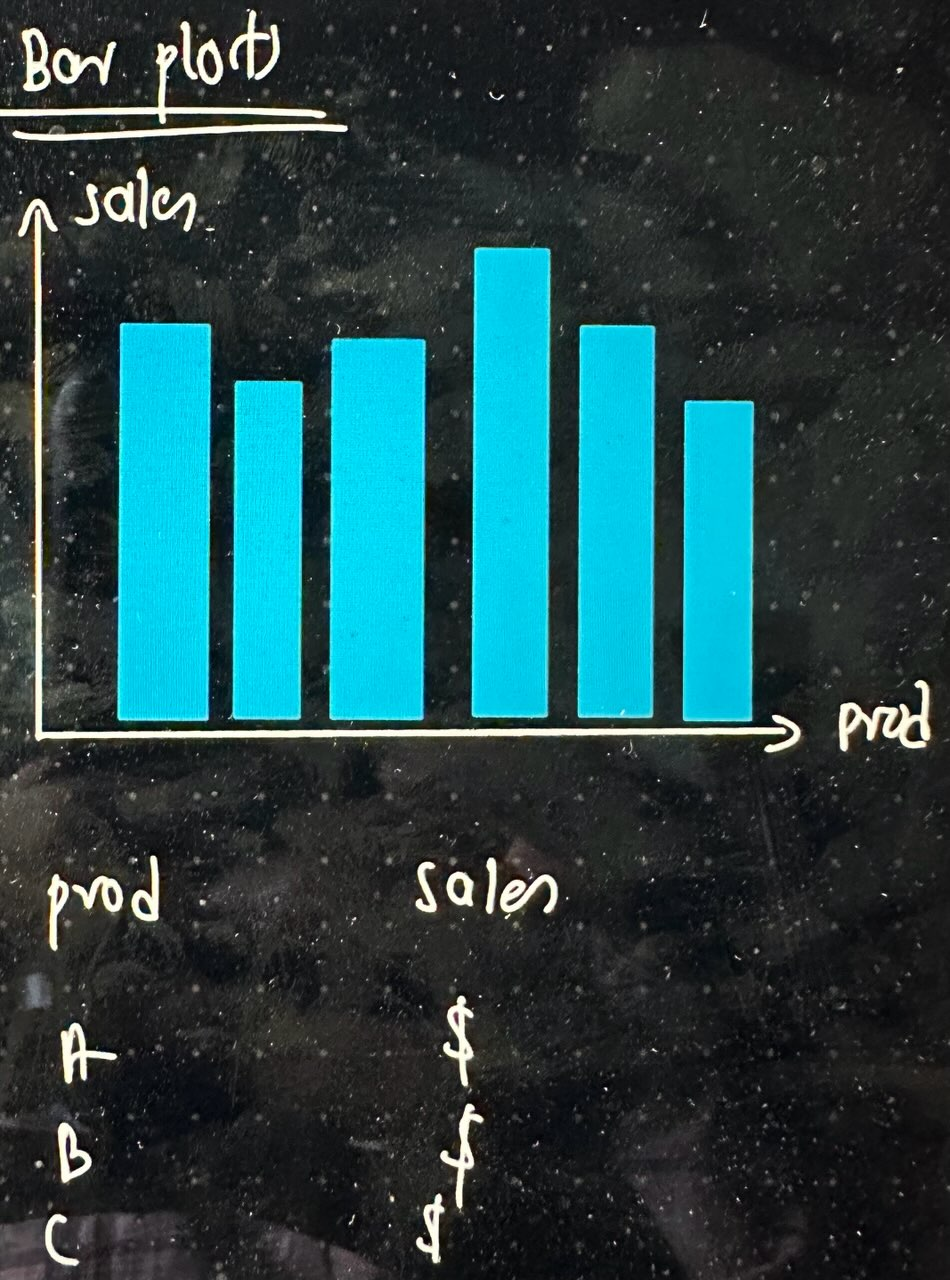

#### Stacked Bar Plot
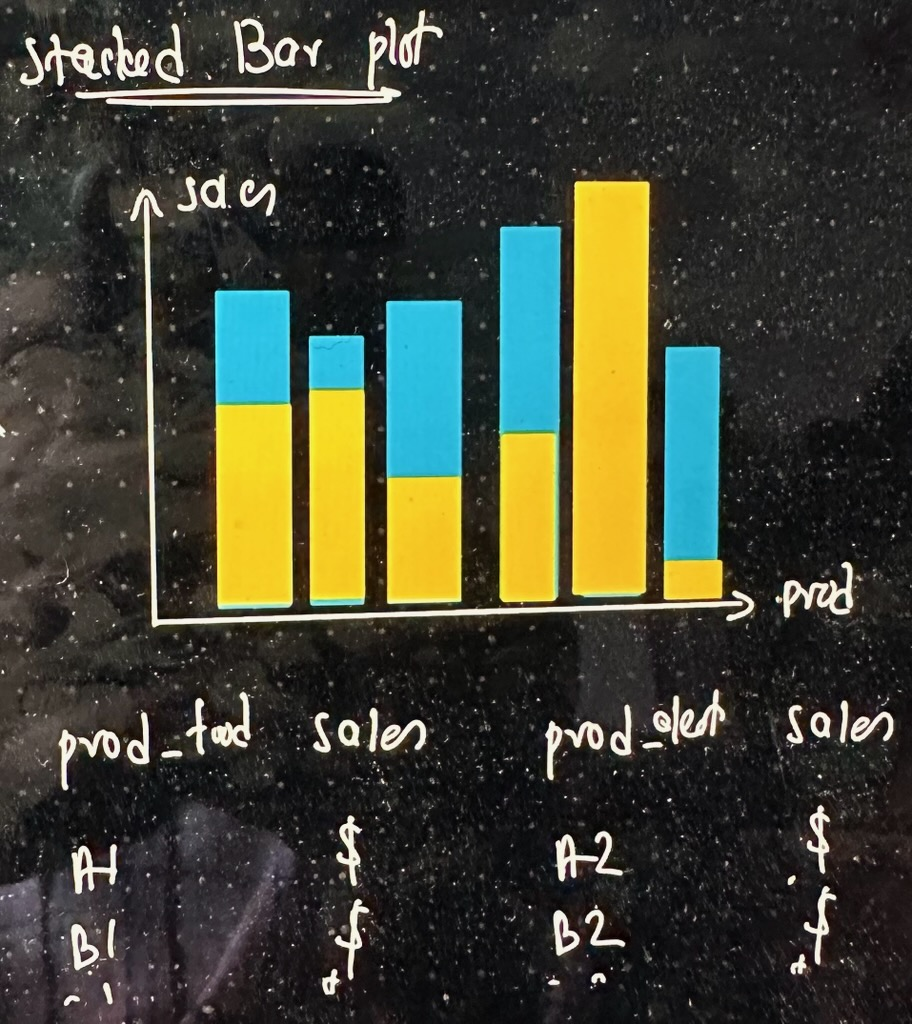
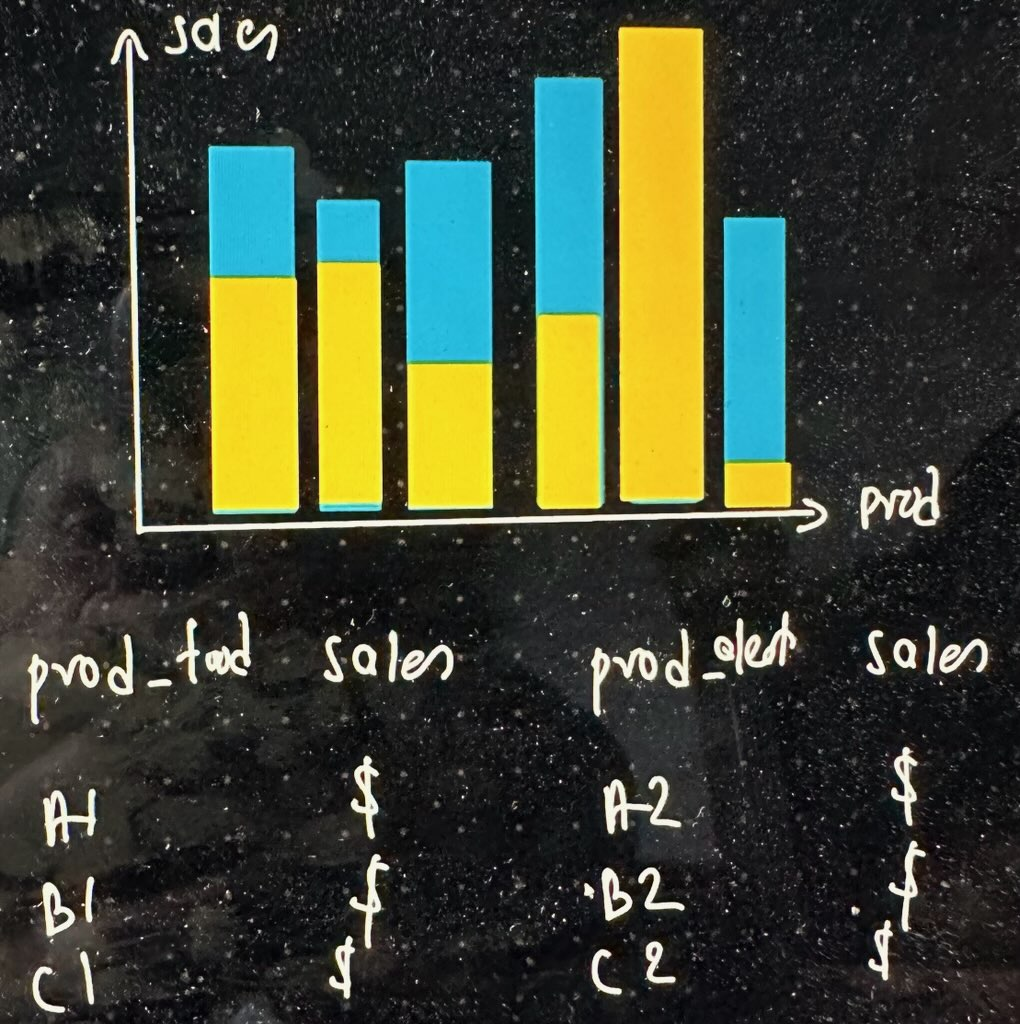

#### Pie Chart
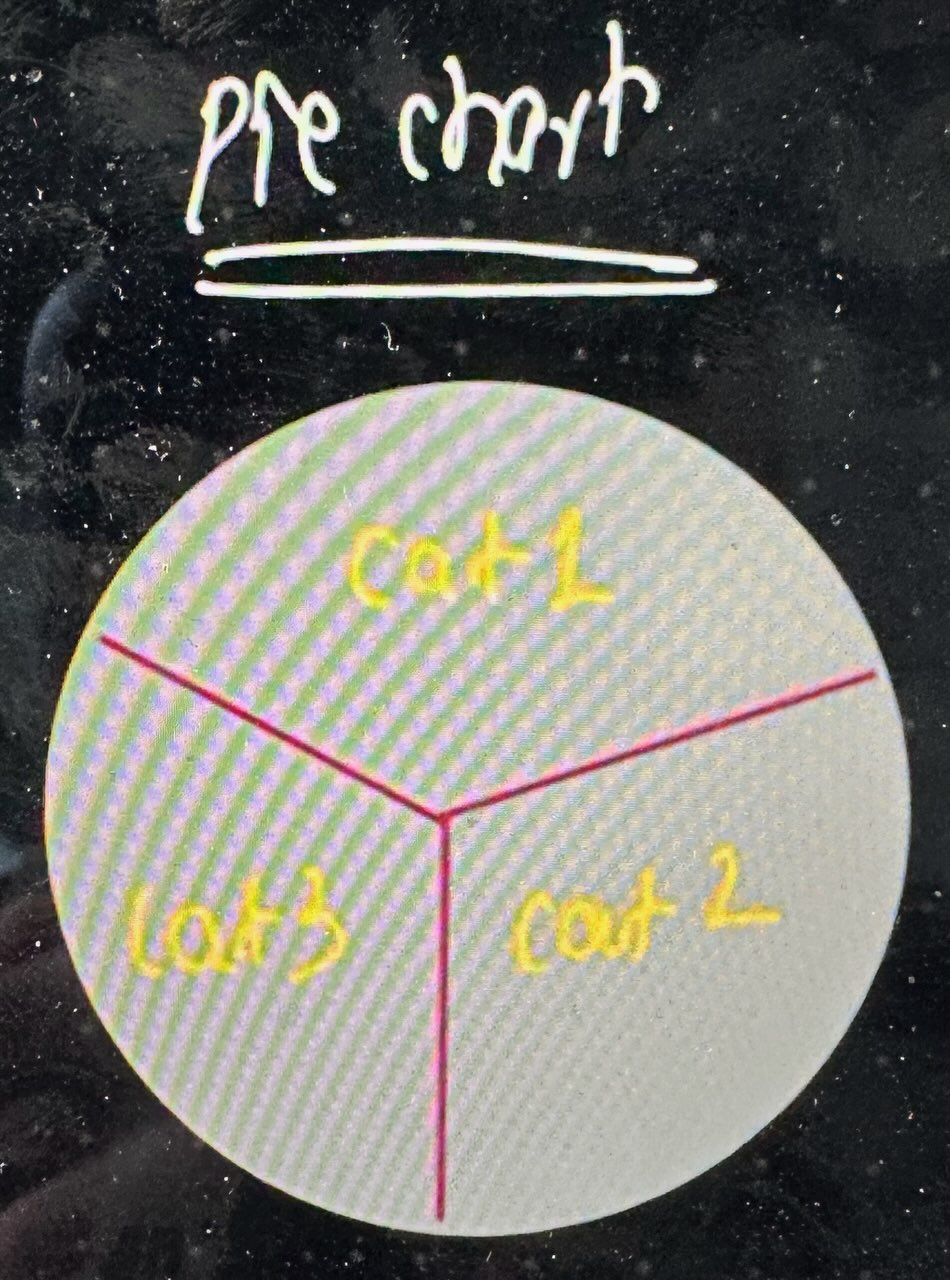

#### Box Plots
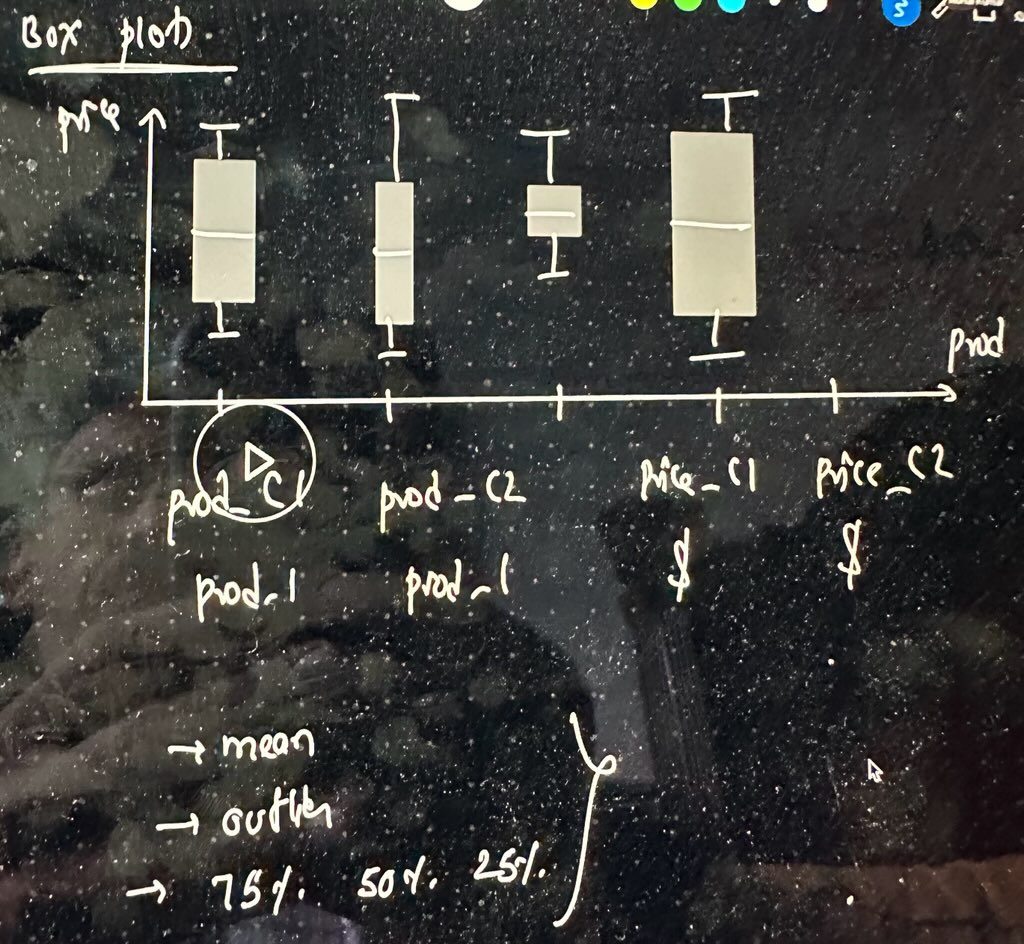
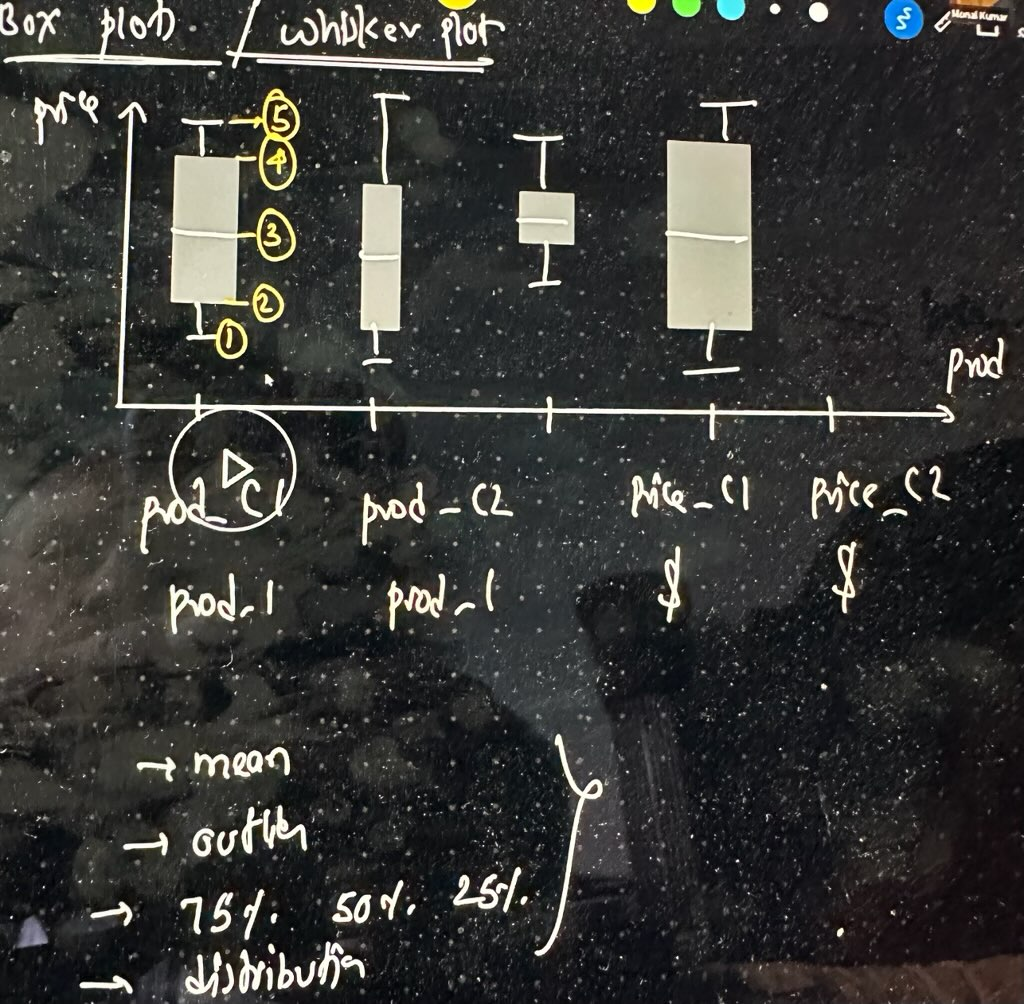

In [6]:
!pip3 install --upgrade pip

  Using cached pip-25.1.1-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-25.1.1-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.3.1
    Uninstalling pip-24.3.1:
      Successfully uninstalled pip-24.3.1


In [3]:
!pip install openpyxl
!pip install pandas

https://archive.ics.uci.edu/dataset/502/online+retail+ii

##### Dataset Information
This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.
- Has Missing Values? - Yes
- Dataset Characteristics - Multivariate, Sequential, Time-Series, Text
- Subject Area - Business
- Associated Tasks - Classification, Regression, Clustering
- Feature Type - Integer, Real

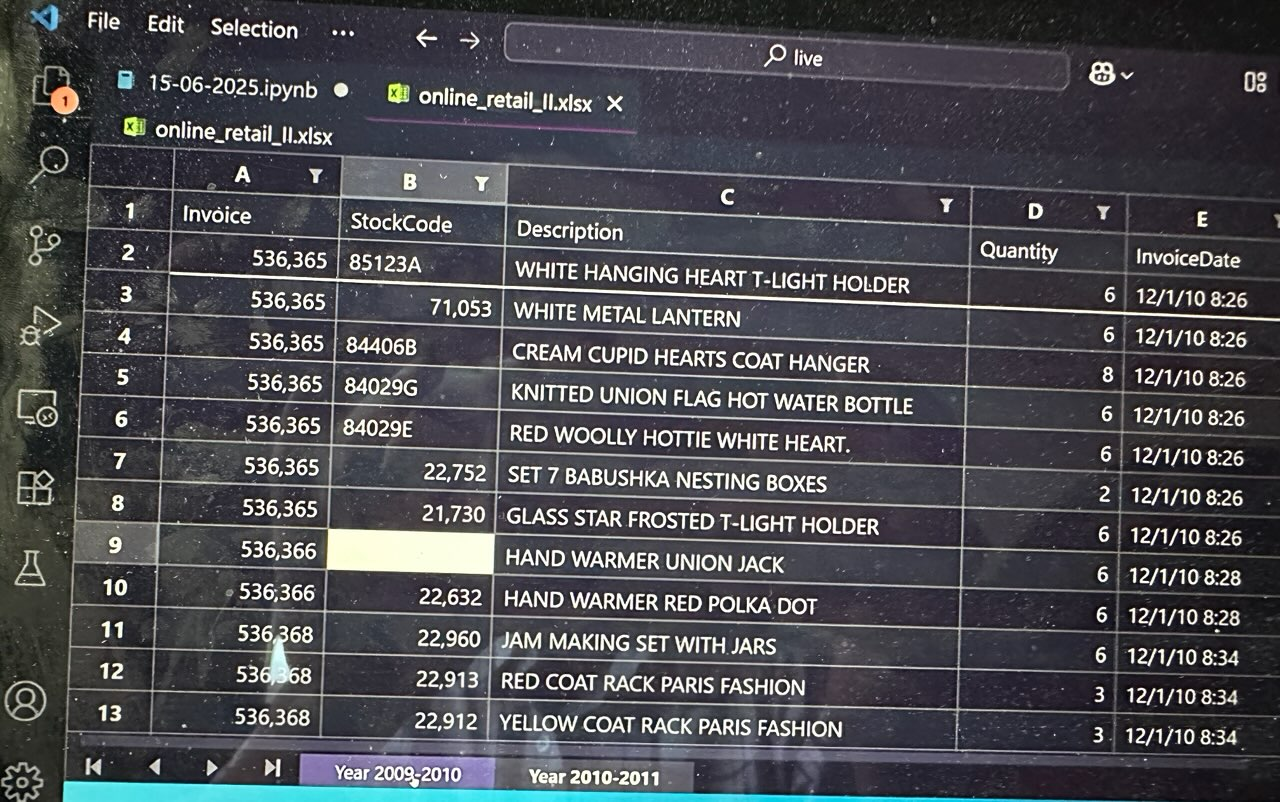


In [57]:
IN_COLAB = 'google.colab' in str(get_ipython())
print(IN_COLAB)

False


In [22]:
#%pip install openpyxl
#%pip install pandas

import pandas as pd

df_1 = pd.read_excel('data/online_retail_II.xlsx', sheet_name='Year 2009-2010')
df_1.head()

df_2 = pd.read_excel('data/online_retail_II.xlsx', sheet_name='Year 2010-2011')
df_2.head()

combined_df = pd.concat([df_1, df_2], ignore_index=True)
print(combined_df.shape)
print(combined_df.index)
print('--------------' *20)
print(combined_df.columns)
print('--------------' *20)
print(combined_df.info())
print('--------------' *20)
print(combined_df.describe())

(1067371, 8)
RangeIndex(start=0, stop=1067371, step=1)
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-n

#### Cleaning & Feature Engineering

In [ ]:
### Drop off rows that does not have a valid invoice date or customer id. Remove columns with NA values.
df = combined_df.dropna(subset=['InvoiceDate', 'Customer ID'])
print(df.shape)
df.head()

(824364, 8)


Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [40]:
### Remove invoices that are canceled. i.e., invoices that start with 'C'
### Get dataframe values that has invoices starting with 'C'
invalid_invoice_series = df['Invoice'].astype(str).str.startswith('C')       ### <class 'pandas.core.series.Series'>
print(invalid_invoice_series.size)      # 824364

### Eliminate invalid invoices from data frame 'df'
print('df count before removing invalid invoices = ', df.size)
df = df[~invalid_invoice_series]
print('df count after removing invalid invoices = ', df.size)
print(df.shape)


805620
df count before removing invalid invoices =  6444960
df count after removing invalid invoices =  6444960
(805620, 8)


In [ ]:
### Remove rows that have Quantity <= 0 or Price <= 0
df = df[df['Quantity'] > 0]
df = df[df['Price'] > 0]
print(df.shape)

# Total Rows removed are 71
805620 - 805549

(805549, 8)


71

In [ ]:
### Add new features to the dataframe
df['Revenue'] = df['Quantity'] * df['Price']            # (feature engineering)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')       # (feature engineering)    - 2009-12
df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  Revenue    Month  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom     83.4  2009-12  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom     81.0  2009-12  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom     81.0  2009-12  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom    100.8  2009-12  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom     30.0  2009-12

#### What is matplotlib
#### matplotlib ---> seaborn, pandas plot

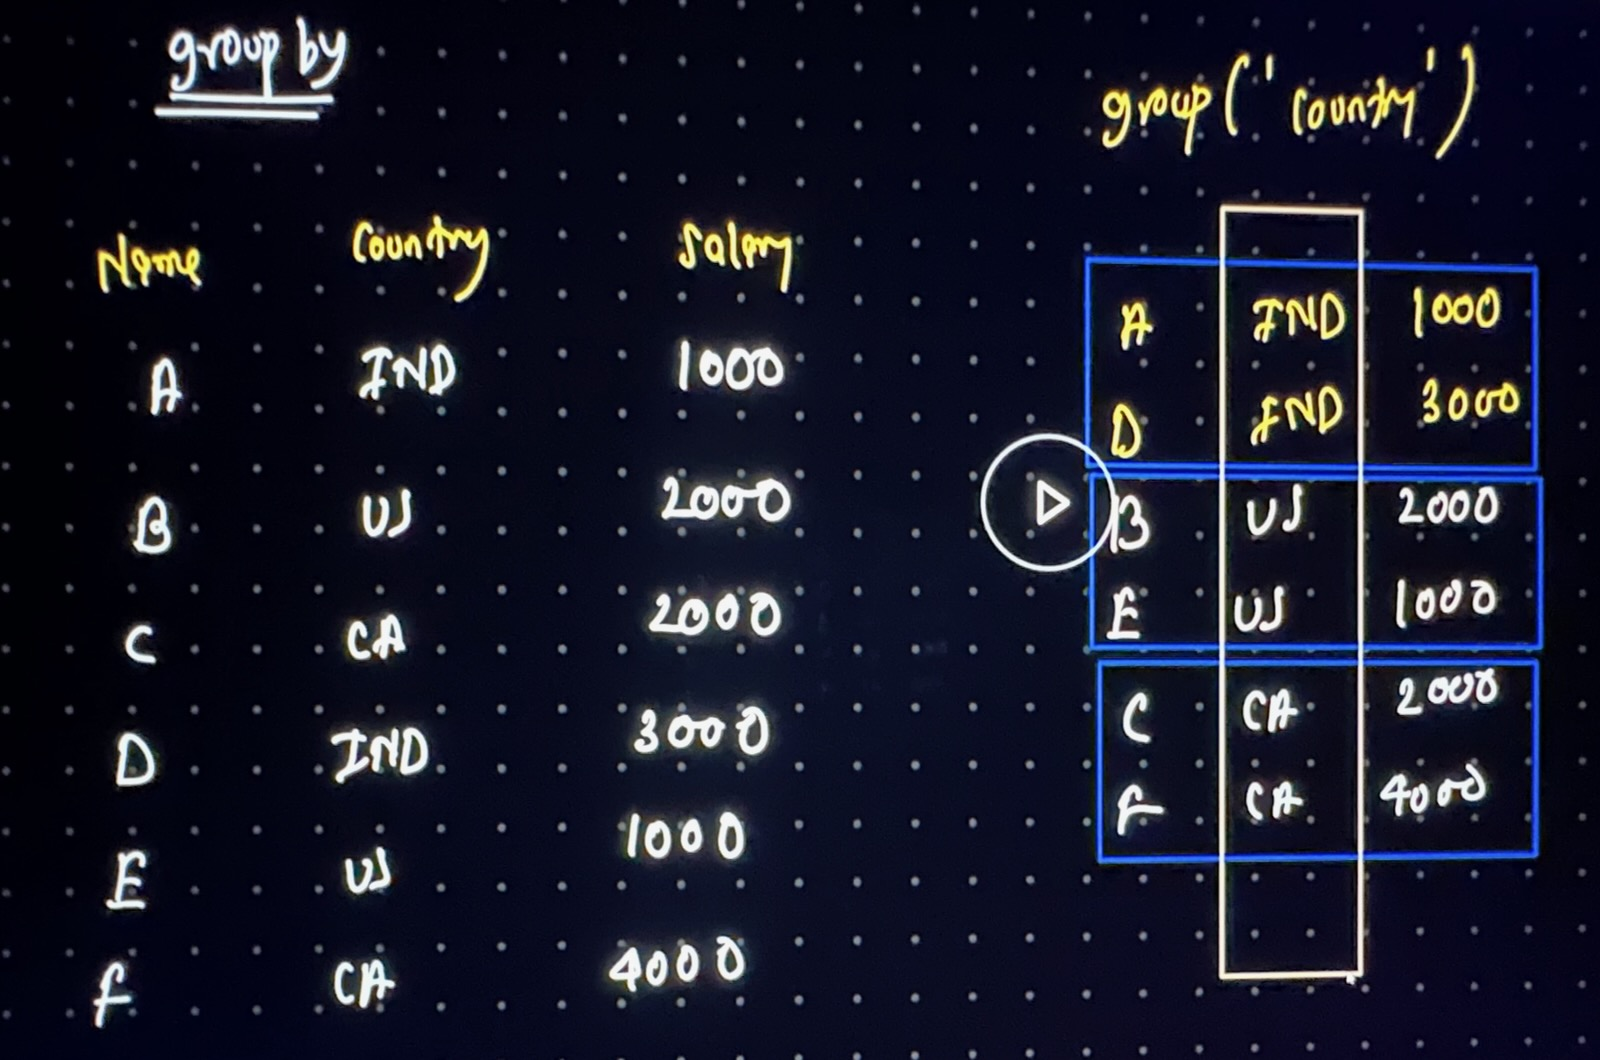

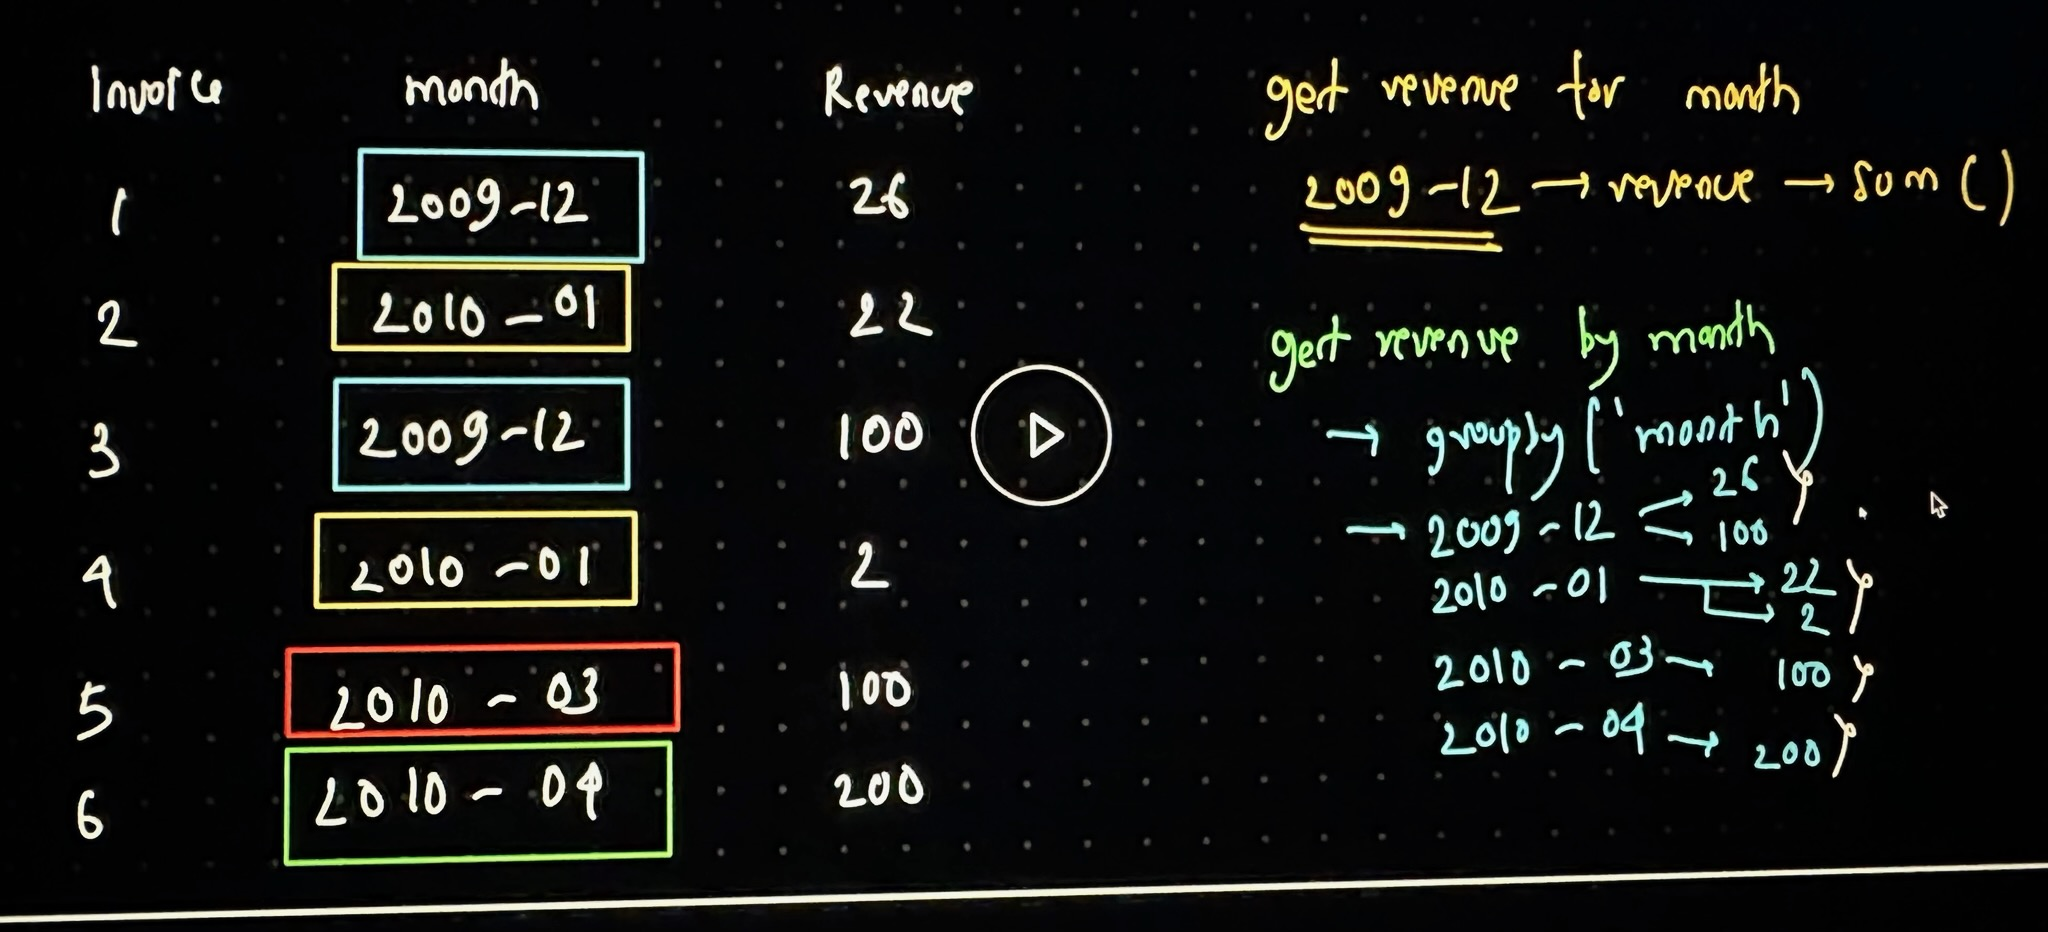

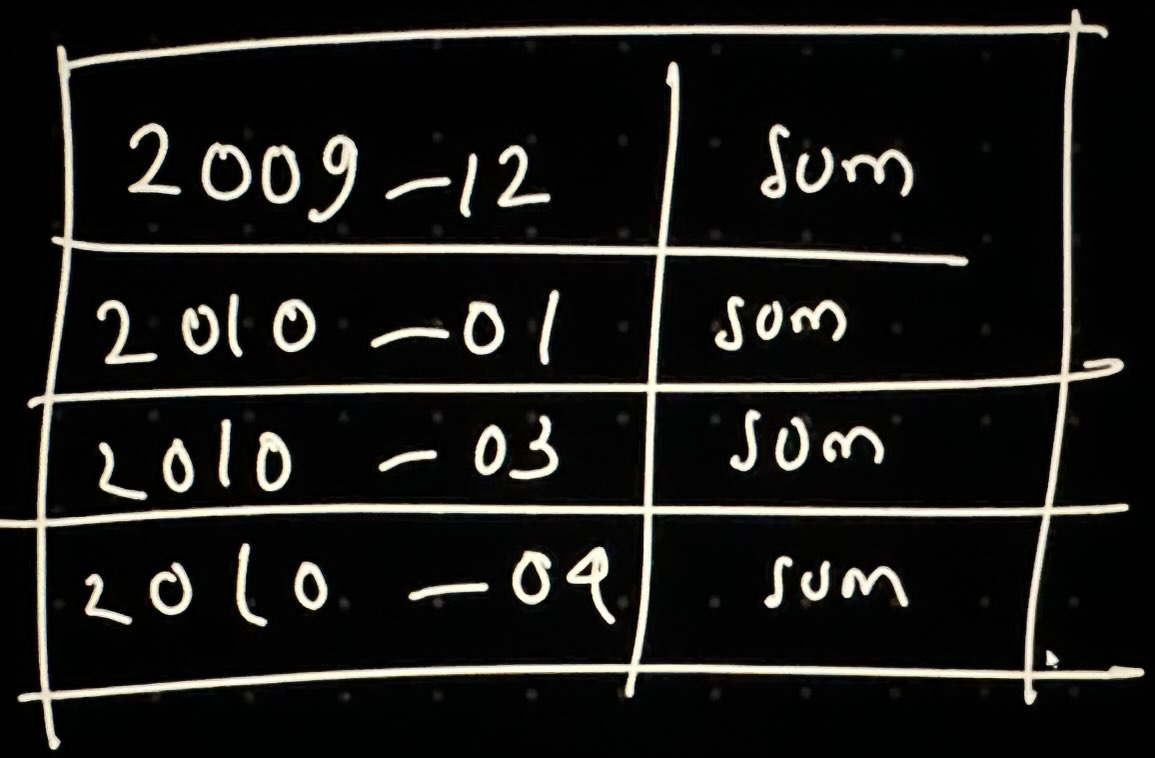

In [93]:
### show revenues grouped by month
monthly_revenue = df.groupby('Month')['Revenue'].sum().sort_index()
print(monthly_revenue)
print('---'*20)
print(monthly_revenue.index)
print('---'*20)
print(monthly_revenue.values)
print('---'*20)

### show top 10 revenue-generating countries - show revenues grouped by country
country_revenue = df.groupby('Country')['Revenue'].sum().sort_index()
print(country_revenue)

Month
2009-12     686654.160
2010-01     557319.062
2010-02     506371.066
2010-03     699608.991
2010-04     594609.192
2010-05     599985.790
2010-06     639066.580
2010-07     591636.740
2010-08     604242.650
2010-09     831615.001
2010-10    1036680.000
2010-11    1172336.042
2010-12     884591.890
2011-01     569445.040
2011-02     447137.350
2011-03     595500.760
2011-04     469200.361
2011-05     678594.560
2011-06     661213.690
2011-07     600091.011
2011-08     645343.900
2011-09     952838.382
2011-10    1039318.790
2011-11    1161817.380
2011-12     518210.790
Freq: M, Name: Revenue, dtype: float64
------------------------------------------------------------
PeriodIndex(['2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05',
             '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11',
             '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05',
             '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11',
   

#### Line Plot
- show revenues grouped by month

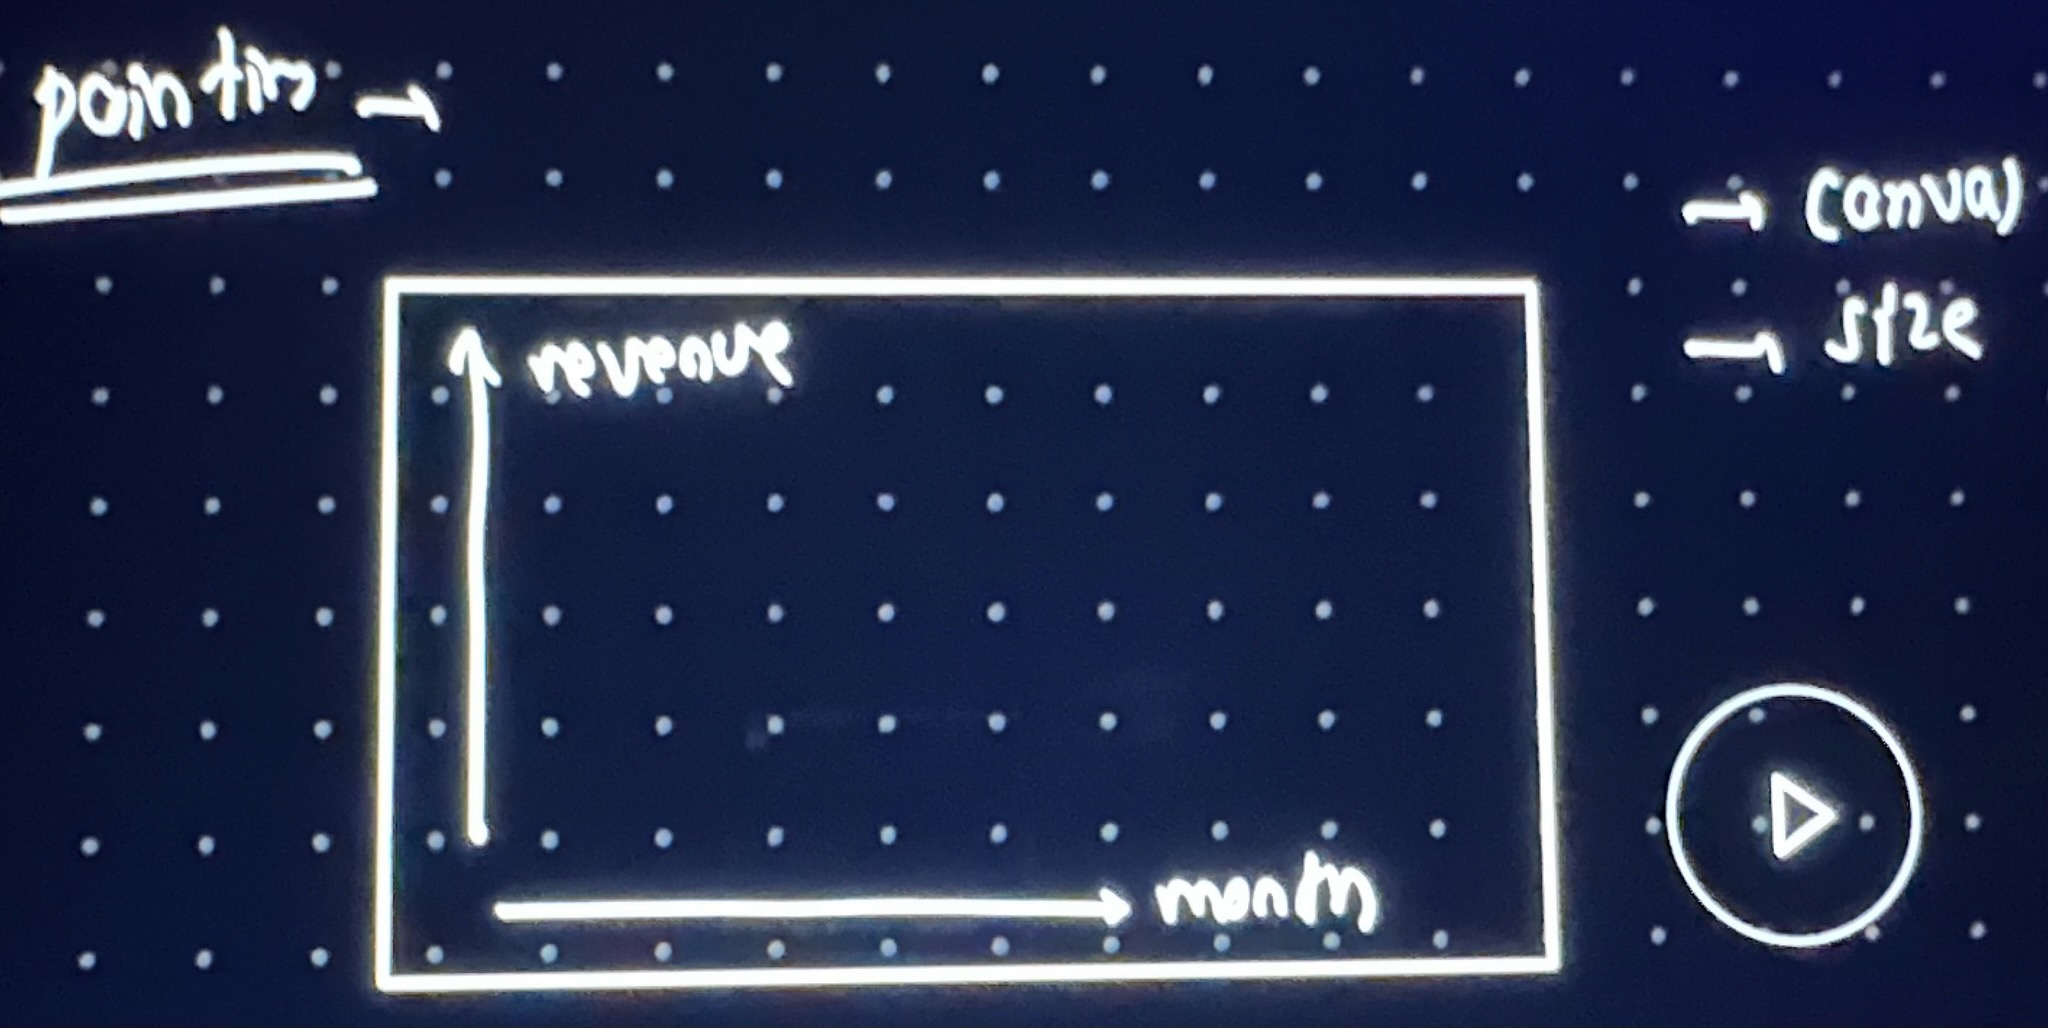

- plt.plot(monthly_revenue.index.astype(str), monthly_revenue.values, marker='o')     # 'o' means circle

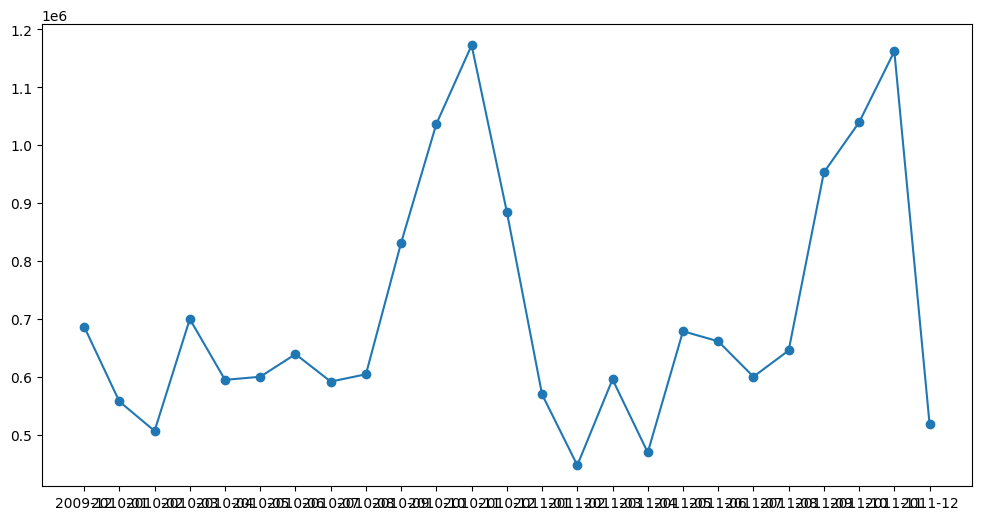

- plt.xticks(rotation=45)     # inclines labels for x-axis by 45 degrees
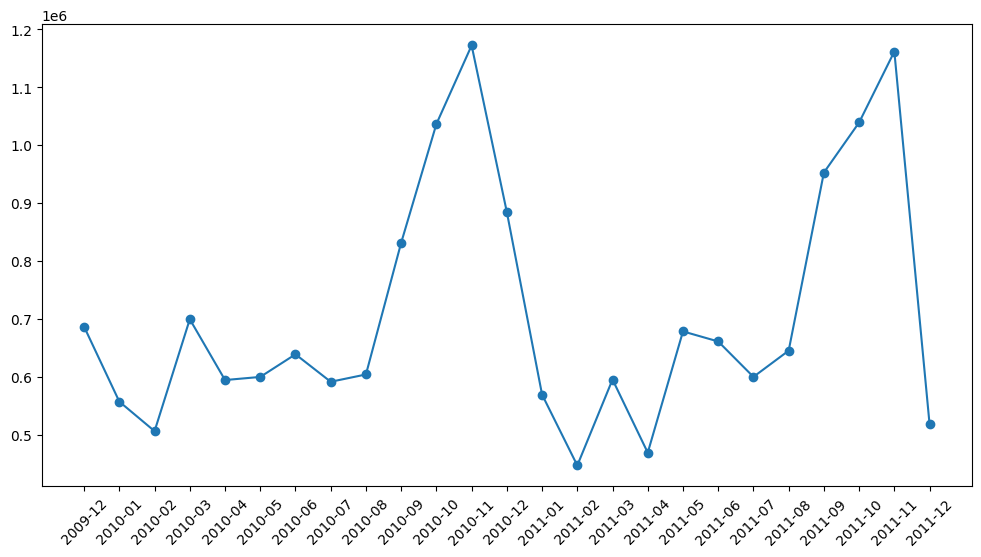

- plt.grid(True)      # Adds grid to the figure
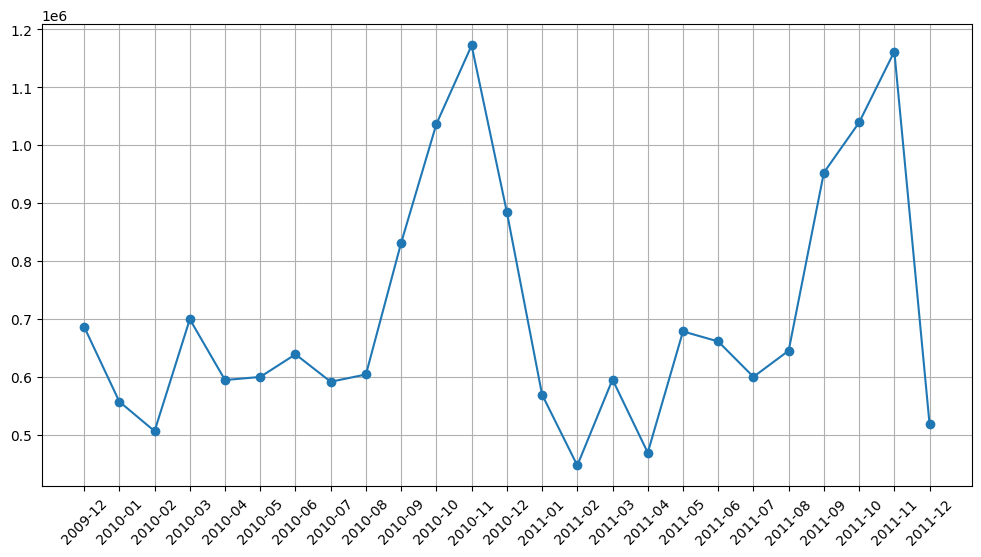

- plt.title('Monthly Revenue Over Time')  # Title for the graph
- plt.xlabel('Year-Month')    # x-axis label
- plt.ylabel('Revenue')       # y-axis label

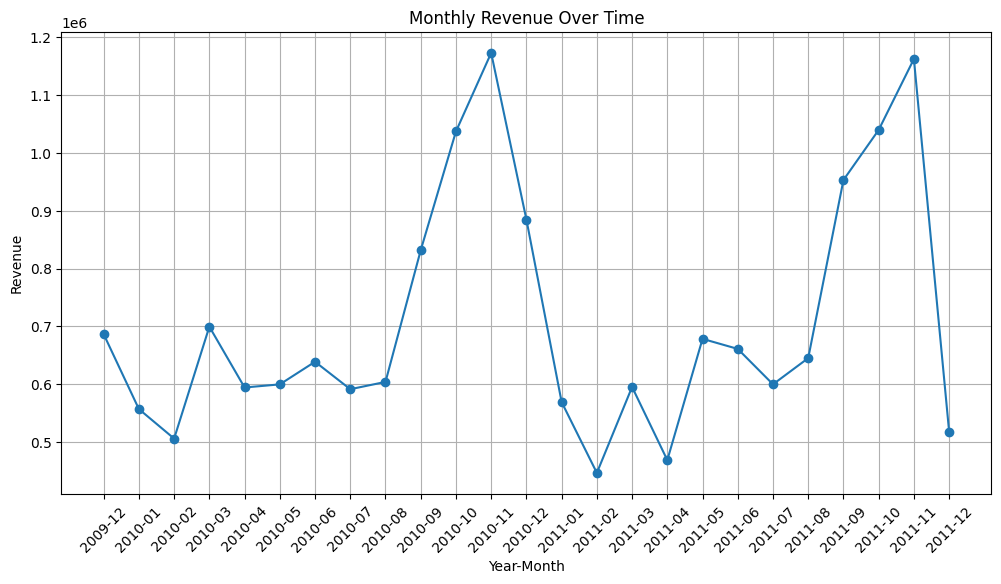

- for i, value in enumerate(monthly_revenue.values):<br>
&nbsp;&nbsp;&nbsp;plt.text(str(monthly_revenue.index[i]), monthly_revenue.values[i], f'{int(value)}', ha='center', fontsize=9)

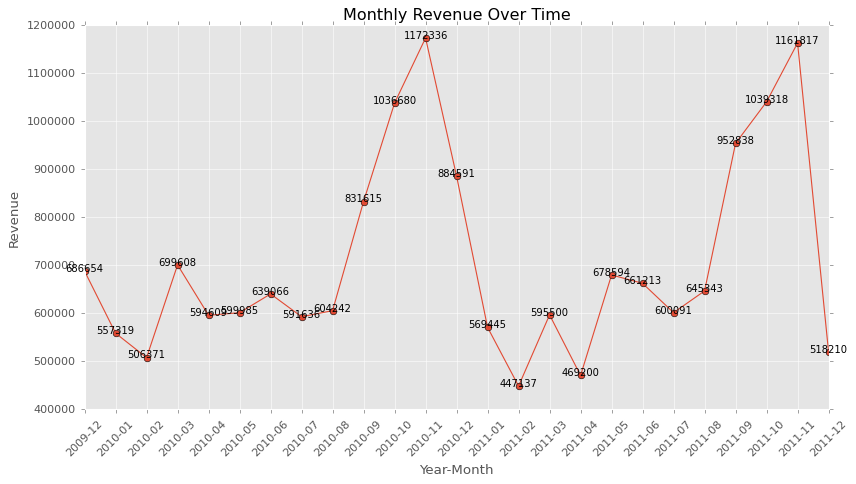

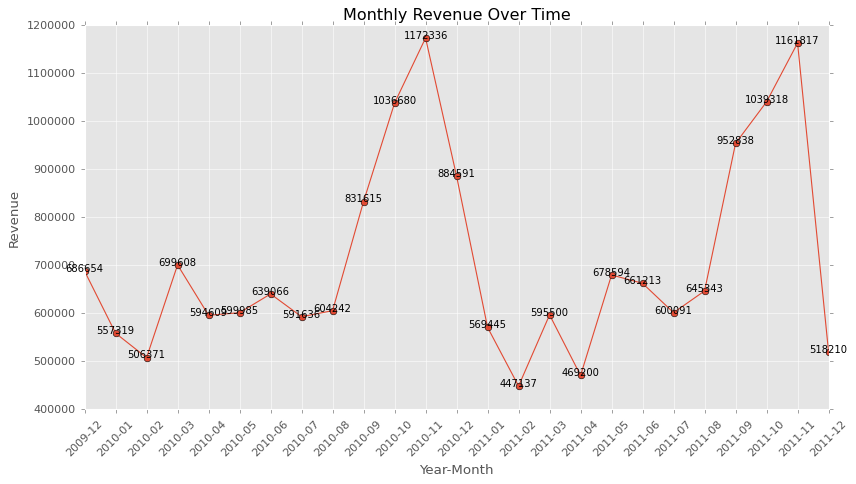

<Figure size 640x480 with 0 Axes>

In [ ]:
### Line Plot Example without a font setting
###
#%pip install matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))     # <Figure size 1200x600 with 0 Axes>
plt.plot(monthly_revenue.index.astype(str), monthly_revenue.values, marker='o')     # 'o' means circle; x-axis & y-axis
# Without the string conversion of the monthly_revenue.index, you will get error.
# The error occurs because monthly_revenue.index is a pandas PeriodIndex, which matplotlib cannot plot directly. 
# You need to convert the index to a string or datetime format before plotting.
#plt.style.use('classic')
plt.style.use('ggplot')

for i, value in enumerate(monthly_revenue.values):
    # plt.text - x value, y value and value to show
    plt.text(str(monthly_revenue.index[i]), monthly_revenue.values[i], f'{int(value)}', ha='center', fontsize=9)
#    print(i)
#    print(value)

plt.title('Monthly Revenue Over Time')  # Title for the graph
plt.xlabel('Year-Month')    # x-axis label
plt.xticks(rotation=45)     # inclines ticks for x-axis by 45 degrees
plt.ylabel('Revenue')       # y-axis label
plt.grid(True)      # Adds grid to the figure
plt.show()

plt.savefig('data/monthly_revenue_plot.png')    # save the plot to an image file.

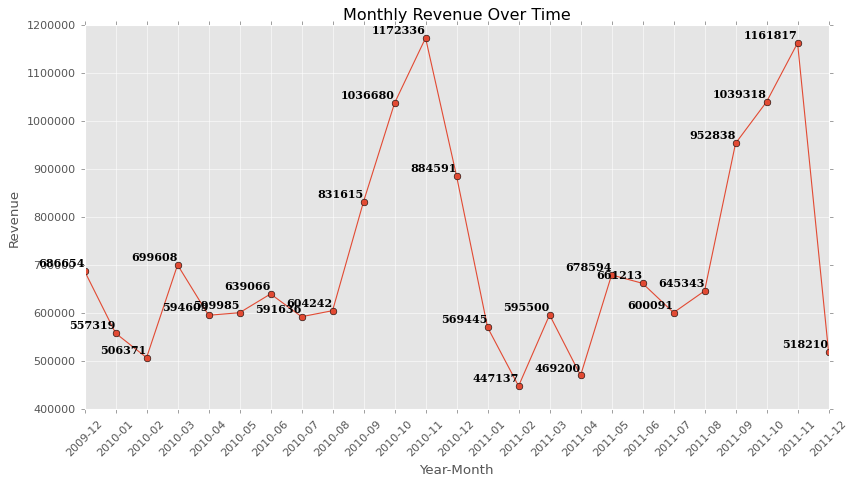

<Figure size 640x480 with 0 Axes>

In [ ]:
### Line Plot Example with font setting
###
#%pip install matplotlib
import matplotlib.pyplot as plt

font = {
    'family':'serif',
    'color':'black',
    'weight':'bold',
    'size':10,
}

plt.figure(figsize=(12, 6))     # <Figure size 1200x600 with 0 Axes>
plt.plot(monthly_revenue.index.astype(str), monthly_revenue.values, marker='o')     # 'o' means circle; x-axis & y-axis
# Without the string conversion of the monthly_revenue.index, you will get error.
# The error occurs because monthly_revenue.index is a pandas PeriodIndex, which matplotlib cannot plot directly. 
# You need to convert the index to a string or datetime format before plotting.
#plt.style.use('classic')
plt.style.use('ggplot')

for i, value in enumerate(monthly_revenue.values):
    # plt.text - x value, y value and value to show
 #   plt.text(str(monthly_revenue.index[i]), monthly_revenue.values[i], f'{int(value)}', ha='right', fontdict=font)
    plt.text(str(monthly_revenue.index[i]), monthly_revenue.values[i]+10000, f'{int(value)}', ha='right', fontdict=font)  
    # you add some finite value to the second parameter (y-value) to make the text show a little away from the markets.
#    print(i, value)

plt.title('Monthly Revenue Over Time')  # Title for the graph
plt.xlabel('Year-Month')    # x-axis label
plt.xticks(rotation=45)     # inclines ticks for x-axis by 45 degrees
plt.ylabel('Revenue')       # y-axis label
plt.grid(True)      # Adds grid to the figure
plt.show()

plt.savefig('data/monthly_revenue_plot.png')    # save the plot to an image file.

In [78]:
### prints list of all the gallery styles available to use.
print(plt.style.available) 

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


#### Bar Plot
- show revenues grouped by country (Top revenue earning countries)

**plt.bar** and **plt.barh** are two functions within Matplotlib's pyplot module used for creating bar charts, differing primarily in the orientation of the bars:

**plt.bar (Vertical Bar Chart):**
- Creates a bar chart with vertical bars.
- The categories or labels are typically displayed along the x-axis.
- The values representing the height of each bar are displayed along the y-axis.
- Syntax: plt.bar(x, height, ...) where x represents the x-coordinates of the bars (often categories), and height represents the corresponding bar heights (values).

**plt.barh (Horizontal Bar Chart):**
- Creates a bar chart with horizontal bars.
- The categories or labels are typically displayed along the y-axis.
- The values representing the length of each bar are displayed along the x-axis.
- Syntax: plt.barh(y, width, ...) where y represents the y-coordinates of the bars (often categories), and width represents the corresponding bar lengths (values).

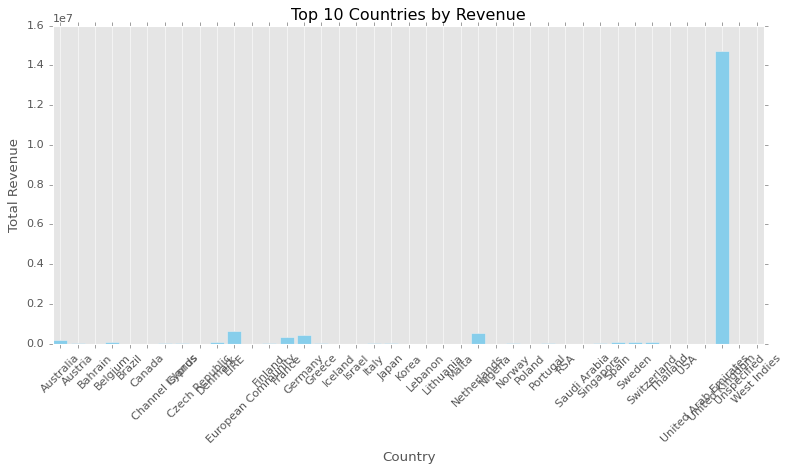

In [ ]:
### Bar (Vertical Bar Chart) Plot
###
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))     # <Figure size 800x480 with 0 Axes>
plt.bar(country_revenue.index, country_revenue.values, color='skyblue') # index is always x-axis and values are mostly y-axis

# customizations
plt.title("Top 10 Countries by Revenue")
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')

plt.show()

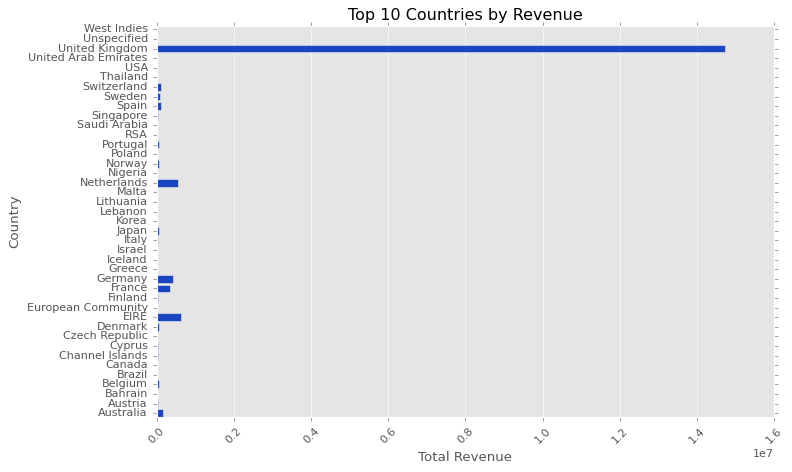

In [ ]:
### Barh (Horizontal Bar Chart) Plot
###
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))     # <Figure size 800x480 with 0 Axes>
barcolor = '#1945C1'    # You can specify color by its hex value
plt.barh(country_revenue.index, country_revenue.values, color=barcolor) # barh(y-value, width (x-value))

# customizations
plt.title("Top 10 Countries by Revenue")
plt.ylabel('Country')
plt.xlabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')

plt.show()